We will learn to perform multi-class classification on Fashion-MNIST using a convolutional neural network. 


1. Explore the Dataset. Display one randomly selected image from each fashion class. 

2. Plot the distribution of number of images in each fashion class. Is the distribution uniform? Comment. 

3. Implememnt the 2D convolution function using a kernel size of 3x3. Use the [sobel kernel](https://en.wikipedia.org/wiki/Sobel_operator) and display the feature map for one example from each fashion class. For using sobel kernel, you need to calculate two convolutions, one for x-direction (x) and one for y-direction (y), the feature map then can be calculated as $F_m = \sqrt(x^2 + y^2)$

4. Using the Keras library, implement a CNN model for classification. Use the following network architecture: 
*  Input layer
*  Con2D with 32 3x3 kernals and ReLU activation
*  Max Pooling layer with pool-size 2x2
*  Con2D with 64 3x3 kernals and ReLU ReLU activation
*  Max Pooling layer with size 2x2
*  Dropout
*  Fully Connected Layer with softmax activation

5. Implement a custom cross-entropy loss (error function) for the multi-class classification. Use it for traning the model.
6. Compile and train your model with four different optimizers viz. SGD
RMSprop, Adam, Adagrad. Plot the training loss for all four optimizers. Comment on your observations. 

7. Choose different hyperparameters for Conv Layers, change number of Conv layer and drop-out rate and train your model. Plot training and test accuracies and losses wrt epochs for different hyper-parameters. Do you find any improvement in classification performance. Report your analysis. 


In [ ]:
# import Fashion MNIST dataset
import keras
from keras.datasets import fashion_mnist

In [ ]:
fashion_data = fashion_mnist.load_data() #load dataset
fashion_data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

### 1.Explore the Dataset. Display one randomly selected image from each fashion class.

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_data
classes = ['T-SHIRT','TROUSERS','PULLOVER','DRESS','COAT','SANDAL','SHIRT','SNEAKER','BAG','ANKLE BOOT'] # Classes/ Image types

In [ ]:
#print number of samples in train and test 
print("Number of samples in train:", len(x_train)) 
print("Number of samples in test:", len(x_test))


Number of samples in train: 60000
Number of samples in test: 10000


In [ ]:
print(np.unique(y_train))
print("Number of classes in dataset: ",len(np.unique(y_train)))

[0 1 2 3 4 5 6 7 8 9]
Number of classes in dataset:  10


Total 10 different classes

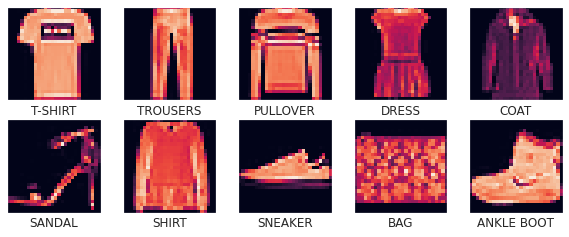

In [ ]:
_, idx = np.unique(y_train, return_index=True)
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[idx[i]])
  plt.xlabel(classes[i])


Above are the images of 10 different classes

### 2.Plot the distribution of number of images in each fashion class. Is the distribution uniform? Comment.

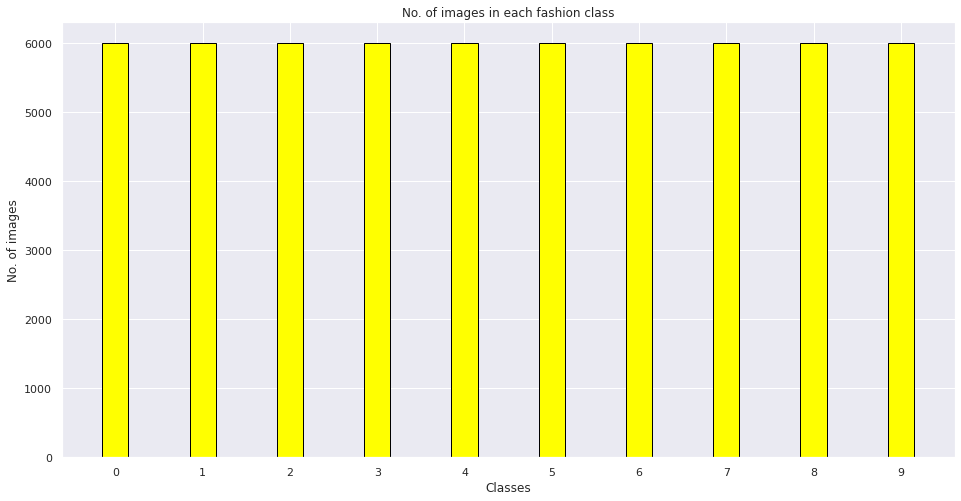

In [ ]:
clas, counts = np.unique(y_train, return_counts=True)
plt.bar(clas, counts, color ='yellow',edgecolor = 'black' ,width = 0.3)
plt.xticks(clas)
plt.xlabel("Classes")
plt.ylabel("No. of images")
plt.title("No. of images in each fashion class")
plt.show()

Number of images for each class is 6000. So, yes the distribution is uniform.

### 3.Implememnt the 2D convolution function using a kernel size of 3x3. Use the sobel kernel and display the feature map for one example from each fashion class. For using sobel kernel, you need to calculate two convolutions, one for x-direction (x) and one for y-direction (y), the feature map then can be calculated as  Fm=(√x2+y2)

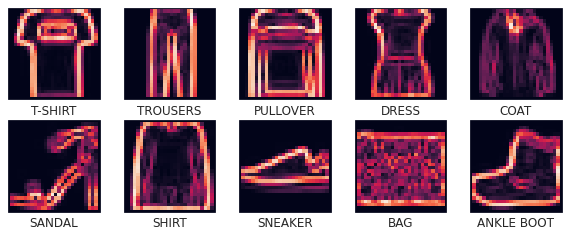

In [ ]:
Gx = np.array([[-1.0, 0.0, 1.0], [-2.0, 0.0, 2.0], [-1.0, 0.0, 1.0]])
Gy = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])
plt.figure(figsize=(10,10))
for i2 in range(10):
  plt.subplot(5,5,i2+1)
  plt.xticks([])
  plt.yticks([])
  ig = x_train[idx[i2]]
  [rows, columns] = np.shape(ig)  # shape of image
  up_img = np.zeros(shape=(rows, columns)) 
  for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(Gx, ig[i:i + 3, j:j + 3])) 
        gy = np.sum(np.multiply(Gy, ig[i:i + 3, j:j + 3]))  
        up_img[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2)  # Fm=(√x2+y2)

  plt.imshow(up_img)
  plt.xlabel(classes[i2])

Using sobel kernel, we can display the edge boundaries as shown in the images above.

### 4.Using the Keras library, implement a CNN model for classification.

*  Input layer
*  Con2D with 32 3x3 kernals and ReLU activation
*  Max Pooling layer with pool-size 2x2
*  Con2D with 64 3x3 kernals and ReLU ReLU activation
*  Max Pooling layer with size 2x2
*  Dropout
*  Fully Connected Layer with softmax activation

###5.Implement a custom cross-entropy loss (error function) for the multi-class classification. Use it for traning the model.

In [ ]:
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
import tensorflow as tf

In [ ]:
def custom_crossEntropy(y_true, y_pred):                          # Custom Cross-entropy function
  loss=-tf.math.reduce_sum(y_true*tf.math.log(y_pred))
  
  return loss/float(y_pred.shape[0])
  #return 0

In [ ]:
# Model Structure 
def CNN_model(x_train, x_test, y_train, y_test, opt):
  x_train = x_train.reshape(-1,28,28,1)
  x_test = x_test.reshape(-1,28,28,1)

  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  

  x_train = x_train/255
  x_test = x_test/255
  train_Y = to_categorical(y_train)
  test_Y = to_categorical(y_test)
  model = Sequential()
  model.add(Conv2D(32,(3,3),input_shape = (28,28,1) ))      #Con2D with 32 3x3 kernals and ReLU activation
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))                #Max Pooling layer with pool-size 2x2

  model.add(Conv2D(64,(3,3),input_shape = (28,28,1) ))      #Con2D with 64 3x3 kernals and ReLU  activation
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))                #Max Pooling layer with pool-size 2x2
  model.add(Flatten())
  model.add(Dense(10))
  model.add(Dropout(0.3))                                   #Dropout
  model.add(Activation('softmax'))                          #Fully Connected Layer with softmax activation

  model.compile(loss = custom_crossEntropy, optimizer = opt, metrics = ['Accuracy'])
  hist = model.fit(x_train, train_Y, epochs =10)
  return hist.history['loss']




In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_data         # Initialize to avoid running CNN on updated data
loss = CNN_model(x_train, x_test, y_train, y_test, 'adam')
#print(loss[-1])

Epoch 1/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.8688 - Accuracy: 0.6552
Epoch 2/10
1875/1875 [==============================] - 53s 29ms/step - loss: 0.7279 - Accuracy: 0.6969
Epoch 3/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.6888 - Accuracy: 0.7077
Epoch 4/10
1875/1875 [==============================] - 67s 35ms/step - loss: 0.6631 - Accuracy: 0.7148
Epoch 5/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.6384 - Accuracy: 0.7229
Epoch 6/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.6239 - Accuracy: 0.7262
Epoch 7/10
1875/1875 [==============================] - 55s 30ms/step - loss: 0.6171 - Accuracy: 0.7253
Epoch 8/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.6014 - Accuracy: 0.7324
Epoch 9/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.5957 - Accuracy: 0.7345
Epoch 10/10
1875/1875 [==============================] - 56s 30m

### 6.Compile and train your model with four different optimizers viz. SGD RMSprop, Adam, Adagrad. Plot the training loss for all four optimizers

In [ ]:
optimizers = [ 'SGD' ,'RMSprop', 'Adam', 'Adagrad' ]
loss_optimizer = []
for optimizer in optimizers:
  (x_train, y_train), (x_test, y_test) = fashion_data                   ## Initialize again to avoid running CNN on updated data
  loss = CNN_model(x_train, x_test, y_train, y_test, optimizer)
  loss_optimizer.append(loss)

Epoch 1/10
1875/1875 [==============================] - 59s 31ms/step - loss: 1.2457 - Accuracy: 0.5373
Epoch 2/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.9332 - Accuracy: 0.6324
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.8647 - Accuracy: 0.6579
Epoch 4/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.8306 - Accuracy: 0.6670
Epoch 5/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.8142 - Accuracy: 0.6725
Epoch 6/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.7976 - Accuracy: 0.6770
Epoch 7/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.7795 - Accuracy: 0.6823
Epoch 8/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.7707 - Accuracy: 0.6868
Epoch 9/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.7668 - Accuracy: 0.6845
Epoch 10/10
1875/1875 [==============================] - 61s 32m

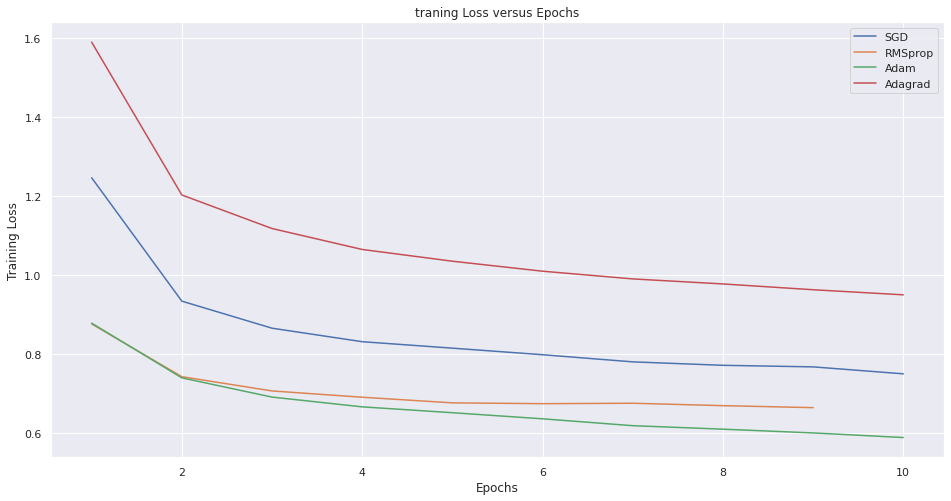

In [ ]:
x_axis_epochs = [*range(1, 11, 1)]
for i in range(4):
  plt.plot(x_axis_epochs, loss_optimizer[i], label = optimizers[i])

plt.title("traning Loss versus Epochs")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.legend()
plt.show()

After compiling and training the model with four different optimizers viz. SGD RMSprop, Adam, Adagrad we can see from the above graph that Adam performs the best after 10 epochs.

###7. Choose different hyperparameters for Conv Layers, change number of Conv layer and drop-out rate and train your model. Plot training and test accuracies and losses wrt epochs for different hyper-parameters. Do you find any improvement in classification performance. Report your analysis.

In [ ]:
epochs_count =  [*range(1, 4, 1)]
loss_hp_train = []
accuracy_hp_train = []
loss_hp_test = []
accuracy_hp_test = []
hyperparameters = [('relu', 0.01, 32, 0.1), ('relu', 0.01, 64, 0.2), ('tanh', 0.001, 64, 0.3)]     #(activation function, learning rate, number of filters, drop out rate)
for j in hyperparameters:
  loss_per_epoch_train = []
  acc_per_epoch_train = []
  loss_per_epoch_test = []
  acc_per_epoch_test = []
  for i in epochs_count:
    (x_train, y_train), (x_test, y_test) = fashion_data                                             #Initialize to avoid running CNN on updated data
    (activation, lr, conv_layers, dropout_rate) = j
    x_train = x_train.reshape(-1,28,28,1)
    x_test = x_test.reshape(-1,28,28,1)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    y_train = y_train.astype('float32')
    y_test = y_test.astype('float32')
    x_train = x_train/255
    x_test = x_test/255
    train_Y = to_categorical(y_train)
    test_Y = to_categorical(y_test)
 
    model = Sequential()
    model.add(Conv2D(32,(3,3),input_shape = (28,28,1) ))
    model.add(Activation(activation))
    model.add(MaxPooling2D(pool_size = (2,2)))

    model.add(Conv2D(conv_layers,(3,3),input_shape = (28,28,1) ))
    model.add(Activation(activation))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Dropout(dropout_rate))
    model.add(Activation('softmax'))
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(loss = custom_crossEntropy, optimizer = opt, metrics = ['Accuracy'])
    hist = model.fit(x_train, train_Y, epochs =i)
    loss_per_epoch_train.append(hist.history['loss'][-1])
    acc_per_epoch_train.append(hist.history['Accuracy'][-1])
    y_pred = model.predict(x_test)
    #print(y_pred)
    loss = np.sqrt(np.mean((y_pred - test_Y)**2))
    loss_per_epoch_test.append(loss)
    acc_per_epoch_test.append(1-loss)

  loss_hp_train.append(loss_per_epoch_train)
  accuracy_hp_train.append(acc_per_epoch_train)
  loss_hp_test.append(loss_per_epoch_test)
  accuracy_hp_test.append(acc_per_epoch_test)


1875/1875 [==============================] - 77s 24ms/step - loss: 0.5513 - Accuracy: 0.7951
Epoch 1/2
1875/1875 [==============================] - 44s 23ms/step - loss: 0.5510 - Accuracy: 0.7926
Epoch 2/2
1875/1875 [==============================] - 42s 22ms/step - loss: 0.4586 - Accuracy: 0.8285
Epoch 1/3
1875/1875 [==============================] - 43s 23ms/step - loss: 0.5487 - Accuracy: 0.7988
Epoch 2/3
1875/1875 [==============================] - 44s 23ms/step - loss: 0.4578 - Accuracy: 0.8279
Epoch 3/3
1875/1875 [==============================] - 53s 28ms/step - loss: 0.6792 - Accuracy: 0.7362
Epoch 1/2
1875/1875 [==============================] - 53s 28ms/step - loss: 0.6813 - Accuracy: 0.7341
Epoch 2/2
1875/1875 [==============================] - 53s 28ms/step - loss: 0.5927 - Accuracy: 0.7643
Epoch 1/3
1875/1875 [==============================] - 52s 28ms/step - loss: 0.6846 - Accuracy: 0.7341
Epoch 2/3
1875/1875 [==============================] - 51s 27ms/step - loss: 0.5939



*   Number of conv layers have been reduced to 1
*   I have taken 3 different cases:


1.  First case has relu activation in conv layer, learning rate = 0.01, number of filters = 34 and dropout rate = 0.1
2.   In second case I change the number of filters to 64 and dropout rate to 0.2
3. In final case I use tanh activation function in conv layer, learning rate of 0.001, number of filters = 64 and dropout rate = 0.3





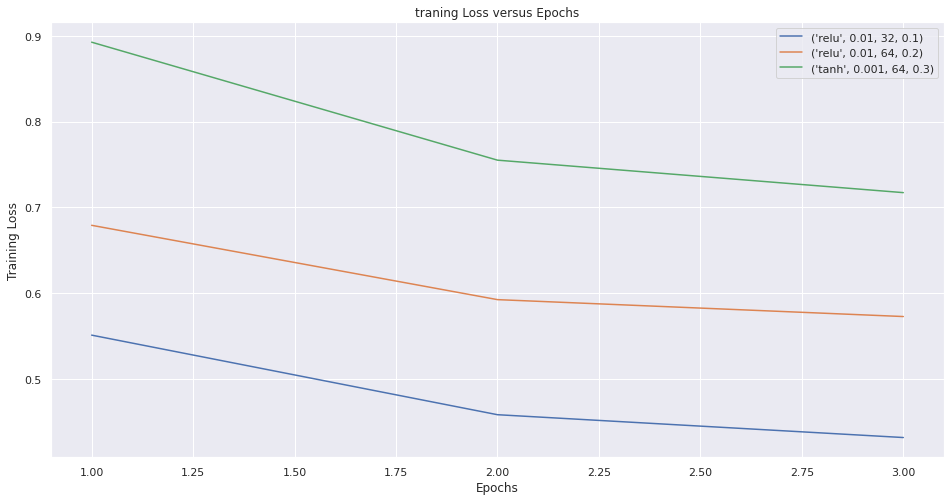

In [ ]:
for i in range(3):
  plt.plot(epochs_count, loss_hp_train[i], label = hyperparameters[i])

plt.title("traning Loss versus Epochs")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.legend()
plt.show()

* Hyperparamters with relu activation function in conv layer, learning rate of 0.01, number of filters = 32 and dropout rate of 0.1 gives least training loss.
* Tanh performs worse than relu

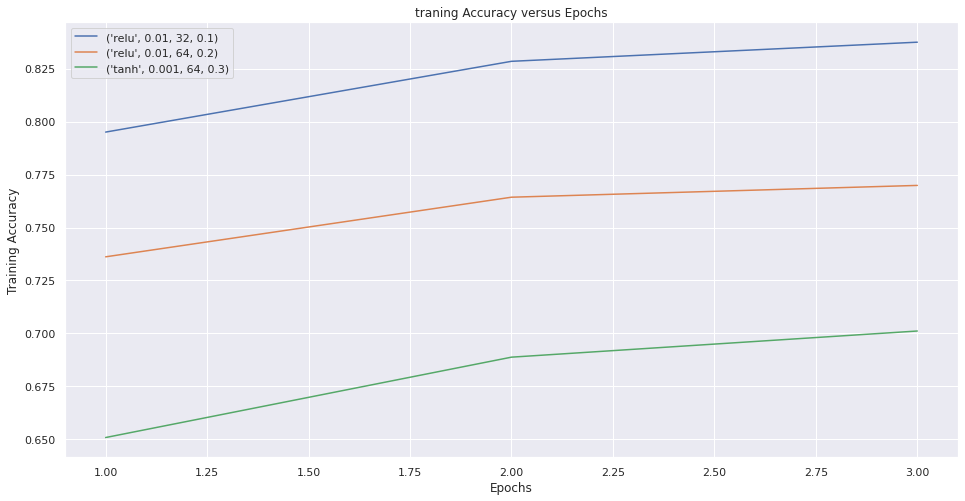

In [ ]:
for i in range(3):
  plt.plot(epochs_count, accuracy_hp_train[i], label = hyperparameters[i])

plt.title("traning Accuracy versus Epochs")
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.legend()
plt.show()

* Hyperparamters with relu activation function in conv layer, learning rate of 0.01, number of filters = 32 and dropout rate of 0.1 gives highest training accuracy.
* Tanh performs worse than relu

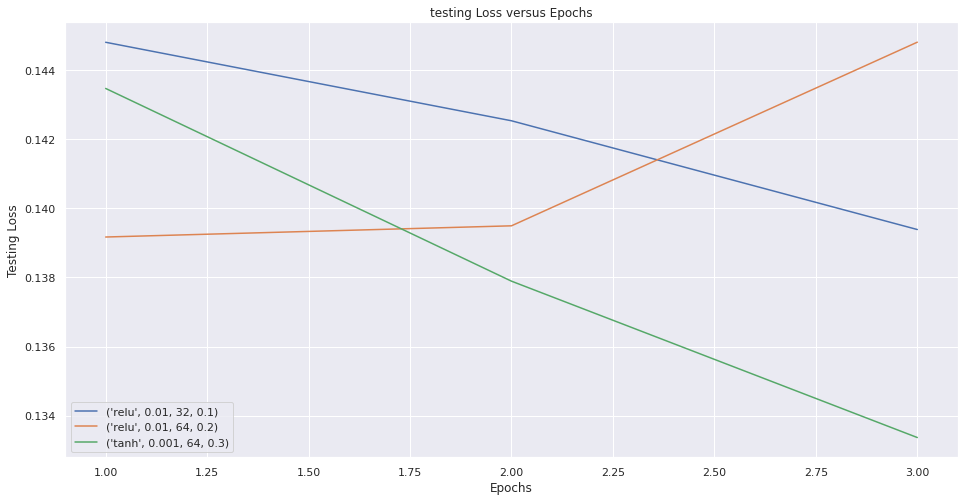

In [ ]:
for i in range(3):
  plt.plot(epochs_count, loss_hp_test[i], label = hyperparameters[i])

plt.title("testing Loss versus Epochs")
plt.xlabel("Epochs")
plt.ylabel("Testing Loss")
plt.legend()
plt.show()

Hyperparamters with tanh activation function in conv layer, learning rate of 0.001, number of filters = 64 and dropout rate of 0.3 gives least testing loss.

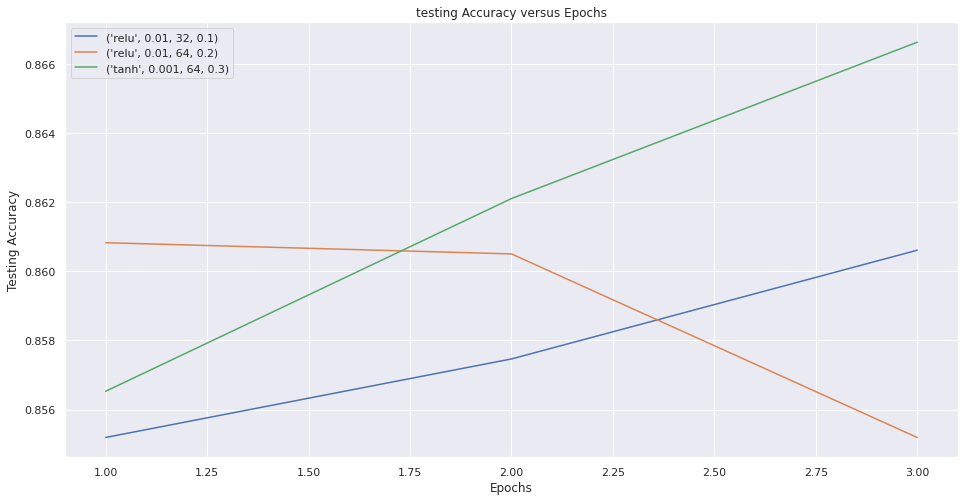

In [ ]:
for i in range(3):
  plt.plot(epochs_count, accuracy_hp_test[i], label = hyperparameters[i])

plt.title("testing Accuracy versus Epochs")
plt.xlabel("Epochs")
plt.ylabel("Testing Accuracy")
plt.legend()
plt.show()

Hyperparamters with tanh activation function in conv layer, learning rate of 0.001, number of filters = 64 and dropout rate of 0.3 gives highest testing accuracy. So, Tanh performs better on testing data, whereas relu performs better on training data depending on the other hyperparameters like learning rate, number of filters, dropout rate, etc.